<a href="https://colab.research.google.com/github/adicu7/TelecomXChallenge/blob/main/ChallengeTelecom_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 **Extracción**

In [2]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
datajson = response.json()

df = pd.DataFrame(datajson)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 **Transformación**

### Explorar columnas, tipos de datos y significado

In [3]:
# Dimensión del DataFrame
print("Dimensiones del DataFrame:", df.shape)

# Ver nombres de columnas y tipos de datos
print("Columnas y tipos de datos:")
print(df.dtypes)

# Valores nulos por columna
print("\nValores nulos:")
print(df.isnull().sum())

Dimensiones del DataFrame: (7267, 6)
Columnas y tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores nulos:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [4]:
# Expandimos cada columna que contiene un diccionario
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_flat = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

df_flat.head(5)



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Comprobación de incoherencias en los datos: Limpieza y validación de datos

In [5]:
# Valores nulos por columna
df_flat.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [6]:
# Filas duplicadas

duplicados = df_flat.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


In [7]:
df_flat.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [8]:
# Revisión de valores categóricos
categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
               'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categoricas:
    print(f"\nValores únicos en {col}:")
    print(df_flat[col].unique())


Valores únicos en gender:
['Female' 'Male']

Valores únicos en Partner:
['Yes' 'No']

Valores únicos en Dependents:
['Yes' 'No']

Valores únicos en PhoneService:
['Yes' 'No']

Valores únicos en MultipleLines:
['No' 'Yes' 'No phone service']

Valores únicos en InternetService:
['DSL' 'Fiber optic' 'No']

Valores únicos en OnlineSecurity:
['No' 'Yes' 'No internet service']

Valores únicos en OnlineBackup:
['Yes' 'No' 'No internet service']

Valores únicos en DeviceProtection:
['No' 'Yes' 'No internet service']

Valores únicos en TechSupport:
['Yes' 'No' 'No internet service']

Valores únicos en StreamingTV:
['Yes' 'No' 'No internet service']

Valores únicos en StreamingMovies:
['No' 'Yes' 'No internet service']

Valores únicos en Contract:
['One year' 'Month-to-month' 'Two year']

Valores únicos en PaperlessBilling:
['Yes' 'No']

Valores únicos en PaymentMethod:
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Valores únicos en Churn:
['No' 'Ye

## Analisis de problemas encontrados:
Charges.Total: Es tipo object en vez de ser tipo numérico.

Churn: tiene un valor vacio.

Además de eso no se encontraron valores nulos, ni filas duplicadas.

# Solución

In [9]:
# Verificar y eliminar filas con Churn vacío
print("Filas con Churn vacío:", df_flat[df_flat['Churn'] == ''].shape[0])

# Filtrar esas filas
df_flat = df_flat[df_flat['Churn'] != '']

Filas con Churn vacío: 224


In [10]:
# Convertimos la columna 'Charges.Total' a float64
df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce')

# Verificamos el cambio
print(df_flat['Charges.Total'].dtype)

# Ver cuántos valores quedaron como NaN por errores de conversión
print("Valores nulos después de conversión:", df_flat['Charges.Total'].isnull().sum())

float64
Valores nulos después de conversión: 11


<ipython-input-10-2572758592>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce')


In [11]:
# Encontrar filas con valores nulos en "Charges.Total"

df_flat[df_flat['Charges.Total'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


### ¿Por qué hay valores nulos?
Generalmente, esto ocurre cuando: el cliente acaba de empezar, por eso aún no ha generado cargos o hay un error en los datos.

In [12]:
# Verificar si los valores nulos tienen tenure = 0 es porque los clientes son nuevos y no han generado cargos.

df_flat[df_flat['Charges.Total'].isnull()][['tenure', 'Charges.Monthly']]

,tenure,Charges.Monthly
975,0,56.05
1775,0,20.00
1955,0,61.90
2075,0,19.70
2232,0,20.25
2308,0,25.35
2930,0,73.35
3134,0,25.75
3203,0,52.55
4169,0,80.85


In [13]:
# Imputar valores nulos en Charges.Total con 0 si tenure == 0

df_flat.loc[(df_flat['Charges.Total'].isnull()) & (df_flat['tenure'] == 0), 'Charges.Total'] = 0.0

In [14]:
# Contar valores nulos después de la imputación
faltantes = df_flat['Charges.Total'].isnull().sum()
print(f"Valores nulos restantes en Charges.Total: {faltantes}")

Valores nulos restantes en Charges.Total: 0


 ## Crear columna Cuentas_Diarias

 Nota:Este valor no es exacto al calendario, pero sirve como aproximación útil para entender costo diario del cliente.

In [15]:
# Crear la columna Cuentas_Diarias como mensual dividido por 30 días
df_flat['Cuentas_Diarias'] = df_flat['Charges.Monthly'] / 30


In [16]:
# Mostrar primeras filas para ver la nueva columna
df_flat[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


## La estandarización y transformación de dato

In [17]:
binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Convertir "Yes"/"No" → 1/0
for col in binarias:
    df_flat[col] = df_flat[col].map({'Yes': 1, 'No': 0})


### Estandarizar valores como "No internet service" o "No phone service"

In [18]:
# Columnas afectadas por 'No internet service'
cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Reemplazar por "No"
for col in cols_internet:
    df_flat[col] = df_flat[col].replace('No internet service', 'No')

# También para 'No phone service'
df_flat['MultipleLines'] = df_flat['MultipleLines'].replace('No phone service', 'No')


In [19]:
cols_si_no = ['MultipleLines'] + cols_internet

for col in cols_si_no:
    df_flat[col] = df_flat[col].map({'Yes': 1, 'No': 0})


# 📊 **Carga y análisis**

Usamos describe() para obtener:

-Media (mean)

-Mediana (50%)

-Desviación estándar (std)

-Valores mínimo y máximo

Entre otros.

In [20]:
# Análisis descriptivo general
df_flat.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000,1.000,1.000000
SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.000,1.000000
Partner,7043.0,0.483033,0.499748,0.000000,0.000000,0.000,1.000,1.000000
Dependents,7043.0,0.299588,0.458110,0.000000,0.000000,0.000,1.000,1.000000
tenure,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
PhoneService,7043.0,0.903166,0.295752,0.000000,1.000000,1.000,1.000,1.000000
MultipleLines,7043.0,0.421837,0.493888,0.000000,0.000000,0.000,1.000,1.000000
OnlineSecurity,7043.0,0.286668,0.452237,0.000000,0.000000,0.000,1.000,1.000000
OnlineBackup,7043.0,0.344881,0.475363,0.000000,0.000000,0.000,1.000,1.000000
DeviceProtection,7043.0,0.343888,0.475038,0.000000,0.000000,0.000,1.000,1.000000


In [21]:
# Agrupar por Churn (0 = No, 1 = Sí)
df_flat.groupby('Churn').describe().T

Churn                            0            1
SeniorCitizen   count  5174.000000  1869.000000
                mean      0.128721     0.254682
                std       0.334923     0.435799
                min       0.000000     0.000000
                25%       0.000000     0.000000
...                            ...          ...
Cuentas_Diarias min       0.608333     0.628333
                25%       0.836667     1.871667
                50%       2.147500     2.655000
                75%       2.946667     3.140000
                max       3.958333     3.945000

[128 rows x 2 columns]

In [22]:
columnas_a_analizar = [ 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

for col in columnas_a_analizar:
    print(f"🔹 Análisis para {col}:")
    print(f"  Media: {df_flat[col].mean():.2f}")
    print(f"  Mediana: {df_flat[col].median():.2f}")
    print(f"  Desviación estándar: {df_flat[col].std():.2f}")
    print(f"  Mínimo: {df_flat[col].min():.2f}")
    print(f"  Máximo: {df_flat[col].max():.2f}\n")

🔹 Análisis para Charges.Monthly:
  Media: 64.76
  Mediana: 70.35
  Desviación estándar: 30.09
  Mínimo: 18.25
  Máximo: 118.75

🔹 Análisis para Charges.Total:
  Media: 2279.73
  Mediana: 1394.55
  Desviación estándar: 2266.79
  Mínimo: 0.00
  Máximo: 8684.80

🔹 Análisis para Cuentas_Diarias:
  Media: 2.16
  Mediana: 2.34
  Desviación estándar: 1.00
  Mínimo: 0.61
  Máximo: 3.96



<ipython-input-23-3341242316>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_flat, palette='Set2')


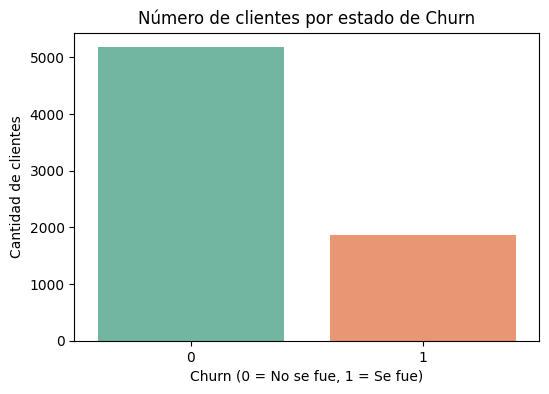

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df_flat, palette='Set2')
plt.title("Número de clientes por estado de Churn")
plt.xlabel("Churn (0 = No se fue, 1 = Se fue)")
plt.ylabel("Cantidad de clientes")
plt.show()

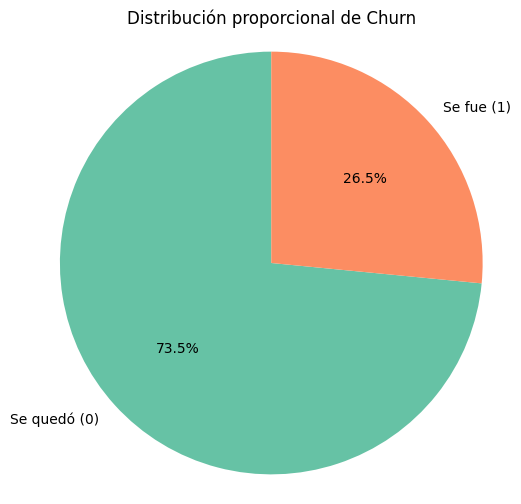

In [24]:
# Cálculo de proporciones
churn_counts = df_flat['Churn'].value_counts()
labels = ['Se quedó (0)', 'Se fue (1)']
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribución proporcional de Churn")
plt.axis('equal')  # Círculo perfecto
plt.show()

## Distribución de evasión

In [25]:
def plot_churn_by_category(column):
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,4))
    sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')
    plt.title(f"Tasa de Churn por {column}")
    plt.ylabel("Proporción de clientes que hicieron Churn")
    plt.xlabel(column)
    plt.xticks(rotation=30)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


<ipython-input-25-3955571352>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


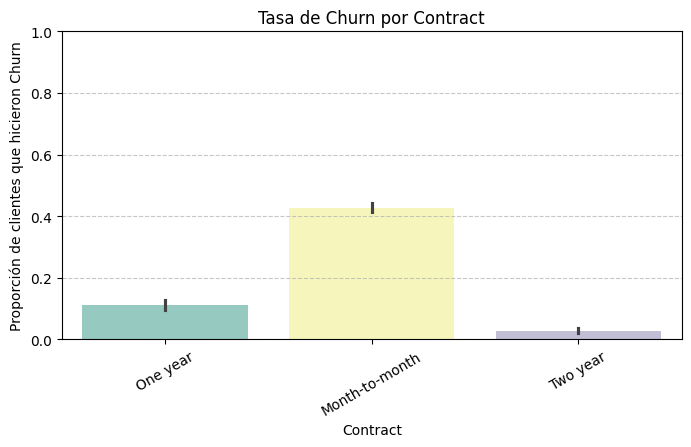

<ipython-input-25-3955571352>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


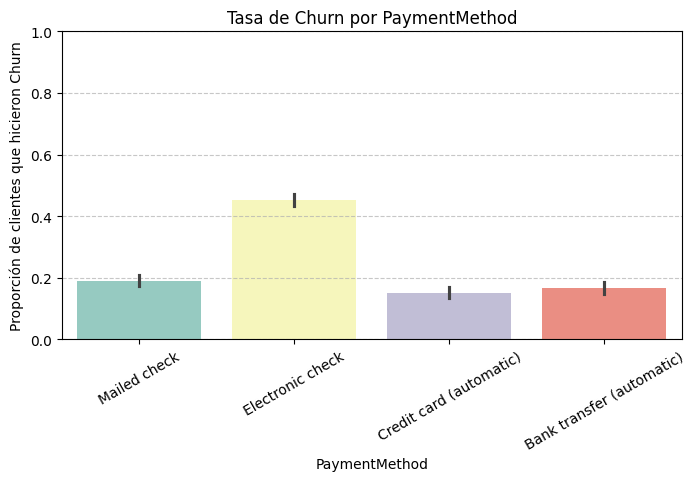

<ipython-input-25-3955571352>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


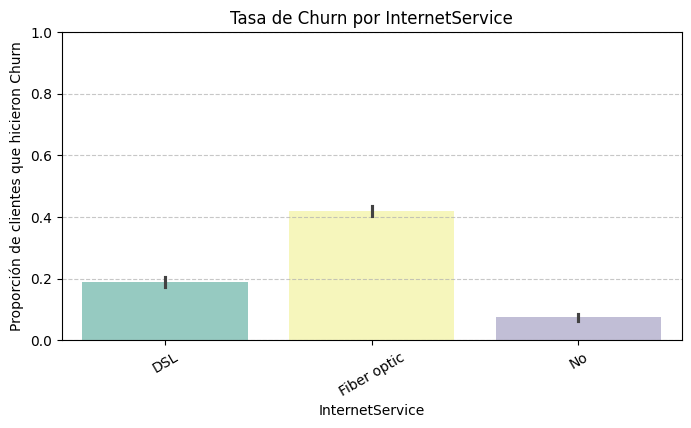

<ipython-input-25-3955571352>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


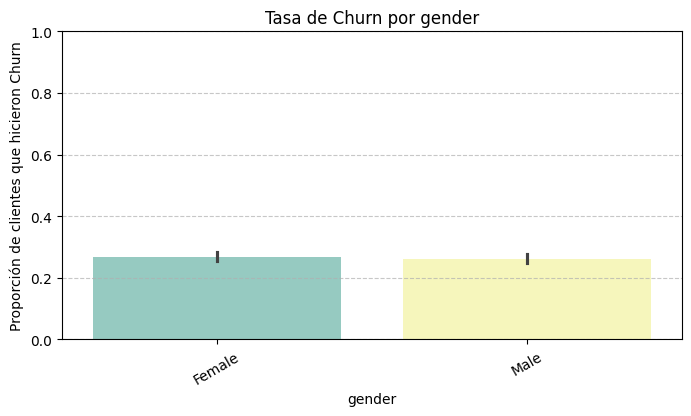

<ipython-input-25-3955571352>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


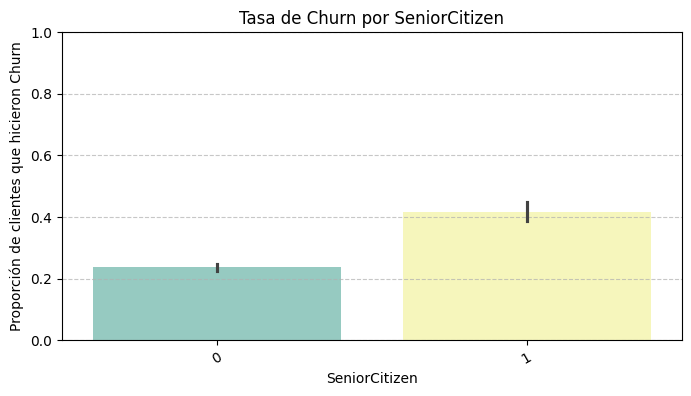

In [26]:
plot_churn_by_category('Contract')
plot_churn_by_category('PaymentMethod')
plot_churn_by_category('InternetService')
plot_churn_by_category('gender')
plot_churn_by_category('SeniorCitizen')


## Recuento de evasión por variables categóricas

In [27]:
def plot_churn_by_category(column):
    plt.figure(figsize=(8,4))
    sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')
    plt.title(f"Proporción de Churn por {column}")
    plt.ylabel("Tasa de Churn (promedio)")
    plt.xlabel(column)
    plt.xticks(rotation=30)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


<ipython-input-27-64273279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


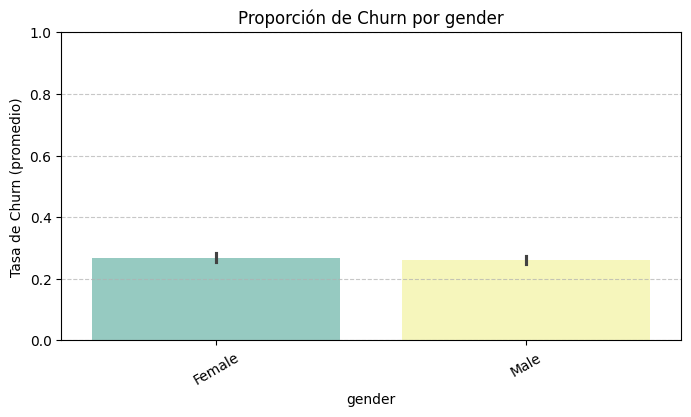

<ipython-input-27-64273279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


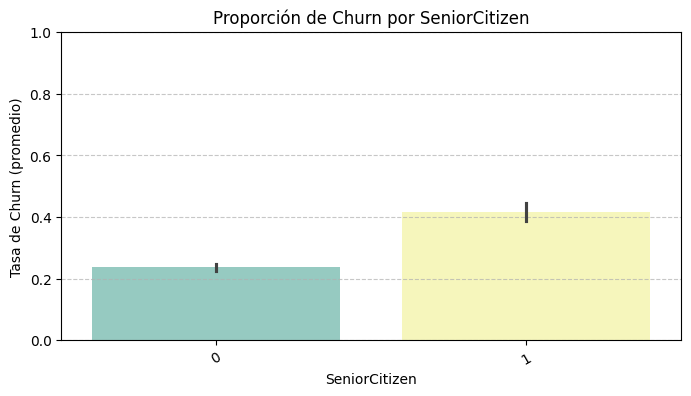

<ipython-input-27-64273279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


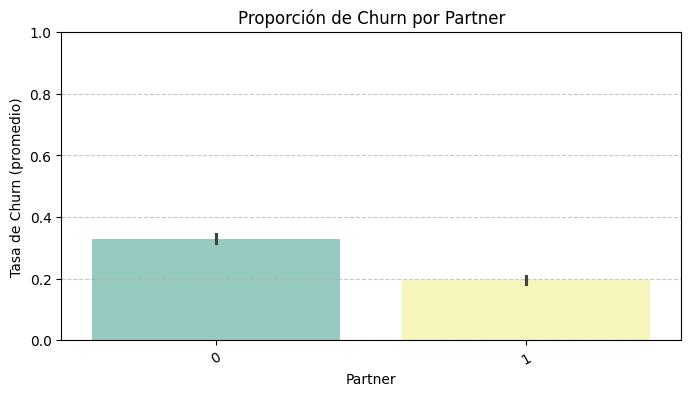

<ipython-input-27-64273279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


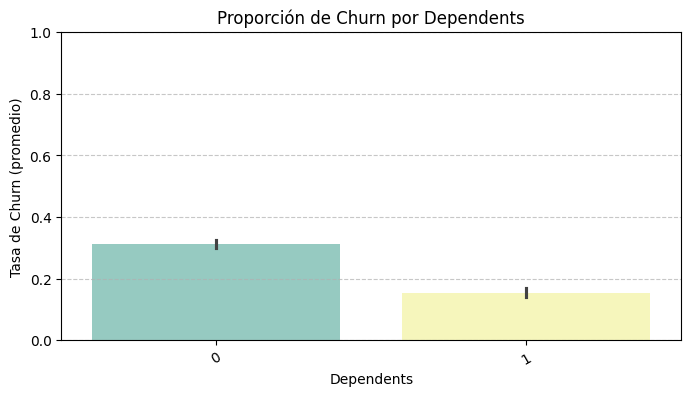

<ipython-input-27-64273279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


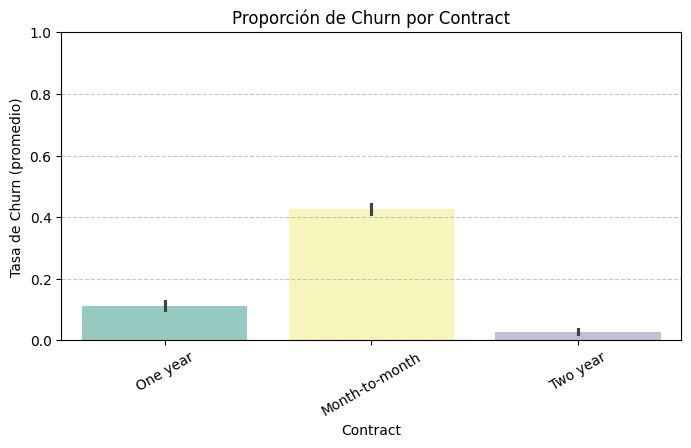

<ipython-input-27-64273279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


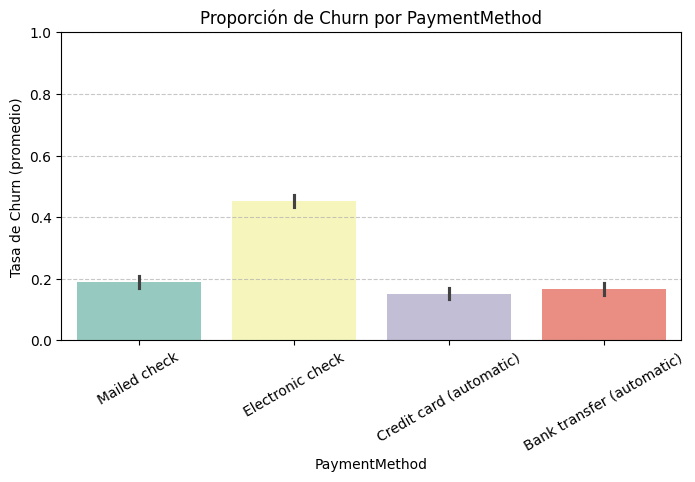

<ipython-input-27-64273279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


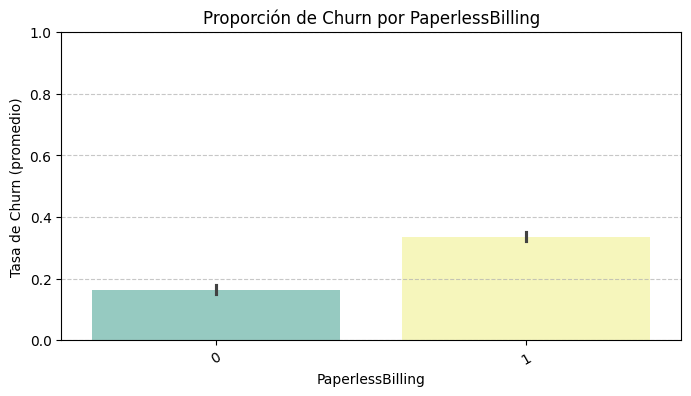

<ipython-input-27-64273279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


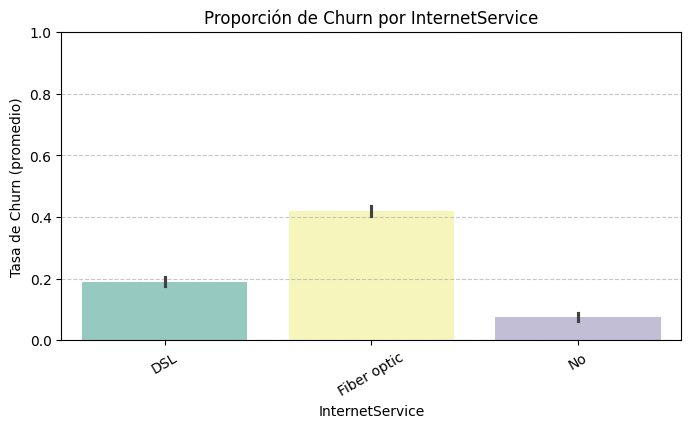

<ipython-input-27-64273279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


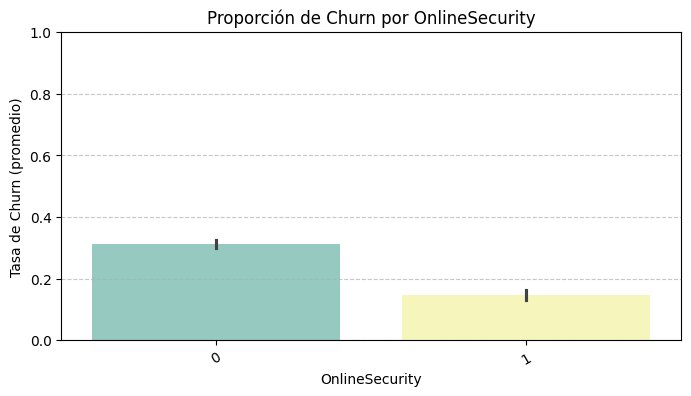

<ipython-input-27-64273279>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column, y='Churn', data=df_flat, estimator='mean', palette='Set3')


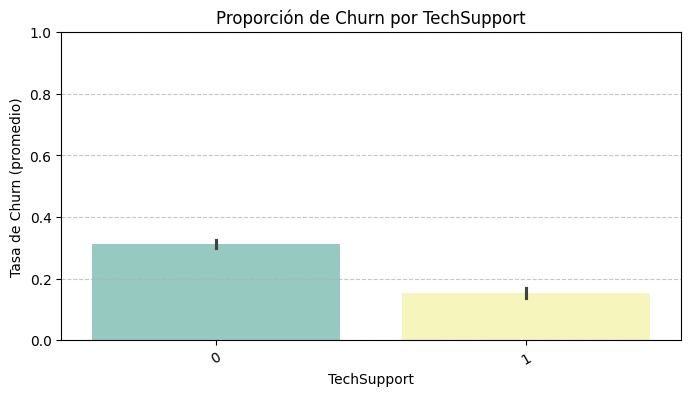

In [28]:
plot_churn_by_category('gender')
plot_churn_by_category('SeniorCitizen')
plot_churn_by_category('Partner')
plot_churn_by_category('Dependents')
plot_churn_by_category('Contract')
plot_churn_by_category('PaymentMethod')
plot_churn_by_category('PaperlessBilling')
plot_churn_by_category('InternetService')
plot_churn_by_category('OnlineSecurity')
plot_churn_by_category('TechSupport')

## Conteo de evasión por variables numéricas

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_dist(column):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df_flat[df_flat['Churn'] == 0], x=column, label='No Churn', fill=True, color='green')
    sns.kdeplot(data=df_flat[df_flat['Churn'] == 1], x=column, label='Churn', fill=True, color='red')
    plt.title(f'Distribución de {column} por Evasión')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


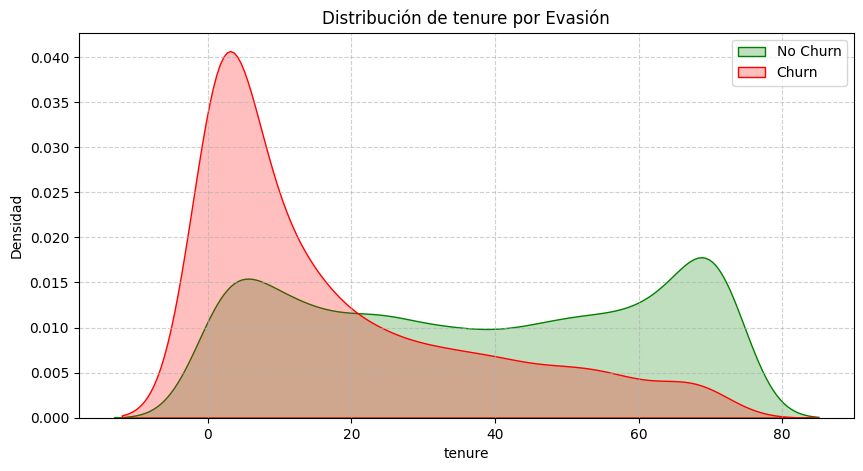

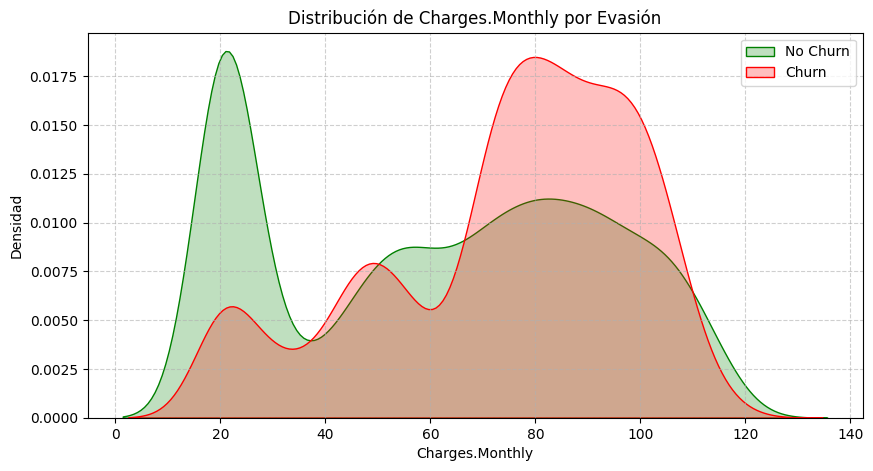

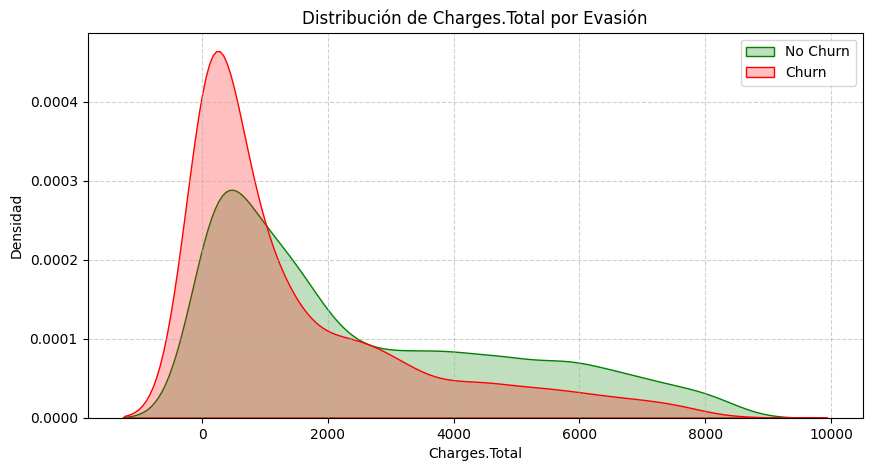

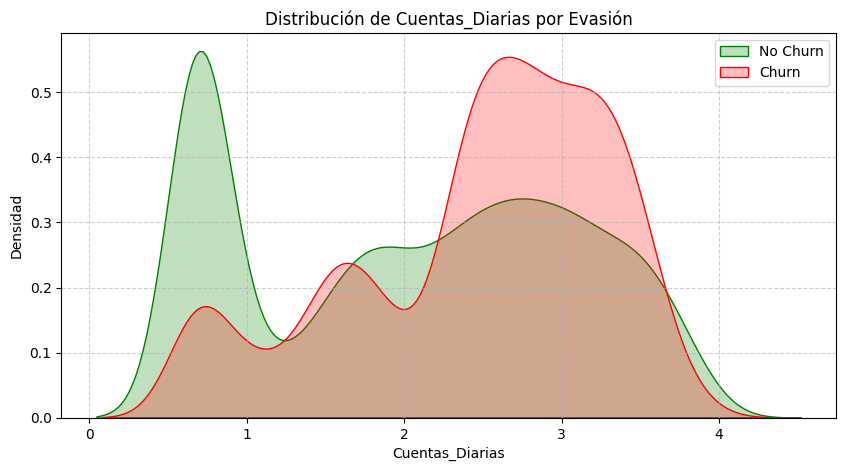

In [33]:
plot_numeric_dist('tenure')
plot_numeric_dist('Charges.Monthly')
plot_numeric_dist('Charges.Total')
plot_numeric_dist('Cuentas_Diarias')

# **📄Informe final**

# 📊 Análisis de Evasión de Clientes – Telecom X

---

## 🔹 Introducción

La retención de clientes es un desafío crítico para empresas de telecomunicaciones. Este análisis tiene como objetivo principal **entender los factores asociados al fenómeno de "Churn" (evasión de clientes)** en la empresa ficticia *Telecom X*. Identificar estos patrones puede ayudar a diseñar estrategias que aumenten la fidelización y disminuyan pérdidas de ingresos.

---

## 🔹 Limpieza y Tratamiento de Datos

Se trabajó con un conjunto de datos en formato JSON obtenido desde un repositorio en GitHub, el cual fue transformado y procesado con los siguientes pasos:

- ✅ Carga del dataset y expansión de columnas anidadas.
- ✅ Verificación de nulos y duplicados: no se detectaron problemas.
- ✅ Conversión de tipos: `Charges.Total` fue convertido de `object` a `float`.
- ✅ Creación de la variable `Cuentas_Diarias`, calculada como `Charges.Monthly / 30`.
- ✅ Estandarización de variables categóricas (Sí/No → 1/0).
- ✅ Traducción de columnas para mejorar legibilidad.
---
## 🔄 Variable clave: Churn
Promedio: 0.265 → El 26.5% de los clientes abandonaron el servicio.


Esto indica una tasa de evasión bastante considerable, más de 1 de cada 4 clientes hace churn.


👴 SeniorCitizen
Solo el 16.2% de los clientes son adultos mayores.


Puedes analizar luego si tienen una tasa de churn más alta.


💑 Partner y Dependents
48.3% tiene pareja.


29.9% tiene dependientes.


Esto puede ayudar a ver si las personas solas tienden más al churn.


📈 tenure (Meses como cliente)
Promedio: 32 meses, pero hay muchos que llevan muy poco (mediana 29).


Clientes con menos tiempo de antigüedad suelen tener más churn (esto lo puedes analizar después con gráficos).


☎️ PhoneService y MultipleLines
Casi todos tienen servicio telefónico (90.3%).


Solo 42% tiene líneas múltiples → puede estar relacionado con ingresos o necesidades familiares.


🌐 Servicios de internet adicionales (OnlineSecurity, TechSupport, etc.)
En general, menos del 40% contratan estos servicios adicionales.


Puedes investigar si tener más servicios disminuye el churn.


💸 Charges.Monthly, Charges.Total, Cuentas_Diarias
Cargo mensual promedio: $64.76.


Cargo total promedio: $2,279, pero muy disperso (std ~ $2,266).


Costo diario promedio: $2.16.


💡 Clientes con cargos altos pueden estar más satisfechos (por más servicios) o más propensos a irse (si sienten que pagan demasiado). Esto se puede visualizar pronto.

---

## 🔹 Análisis Exploratorio de Datos

Se realizó un análisis descriptivo completo:

- **Churn**: Aproximadamente el **26.5% de los clientes se dieron de baja**.
- Clientes con **mayor gasto diario** (`Cuentas_Diarias`) mostraron mayor tendencia al churn.
- Los **adultos mayores** (`SeniorCitizen`) tienen el **doble de probabilidad de irse**.
- Clientes sin servicios adicionales como `TechSupport` o `OnlineSecurity` presentaron tasas de evasión significativamente mayores.

---

## 🔹 Conclusiones e Insights

1. 🔍 **Clientes con contrato mensual** presentan la tasa de churn más alta.
2. 💸 **Métodos de pago automáticos** (tarjeta o transferencia) se asocian con menor evasión.
3. 🛡️ Clientes con servicios de soporte o seguridad tienden a permanecer más tiempo.
4. 👵 **Adultos mayores y personas sin dependientes** son perfiles con mayor riesgo de cancelación.

---

## 🔹 Recomendaciones

✅ **Incentivar contratos de largo plazo** con beneficios exclusivos.

✅ **Ofrecer descuentos o bundles** que incluyan soporte técnico y seguridad en línea.

✅ **Fomentar métodos de pago automáticos** con promociones o puntos de fidelidad.

✅ **Diseñar campañas dirigidas a perfiles de riesgo**, como adultos mayores y usuarios de contrato mensual.

✅ **Implementar sistemas de alertas tempranas**, usando variables como `Cuentas_Diarias`, para identificar clientes con alto riesgo de churn.


